In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import pandas as pd
from planet_cookbook import read_reports as rr
import os
import rebound
import seaborn as sns

sol_to_earth = 332946.078
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [2]:
from IPython.display import HTML
HTML("<style>div.text_cell_render {font-size: 20px;}</style>")

In [3]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

#Color-blind friendly pallete
colors = [
    "#0C7BDC",  # Vibrant Blue
    "#E66100",  # Bright Orange
    "#40B0A6",  # Teal/Aqua
    "#8B8D8B",  # Medium Grey
    "#5D3A9B"   # Muted Purple
]

pd.set_option("display.float_format", "{:.3e}".format)


In [4]:
solar_system_df = pd.read_csv('../evolved_planets/solarsystem.csv')
mercury = solar_system_df[solar_system_df['name'] == 'Mercury']
venus = solar_system_df[solar_system_df['name'] == 'Venus']
earth = solar_system_df[solar_system_df['name'] == 'Earth']
mars = solar_system_df[solar_system_df['name'] == 'Mars']

In [5]:
base_path = "/Users/honeyeah/Codes/data/" #folder with all data

sim_set = "ueda_v3/" #name of simulation set, folder with subfolders the name "sim_set_i"
sim_archive_path = base_path + sim_set + "ueda_v3_" #path given to get_runtime_data function
ueda_v3_rdf = rr.get_runtime_data(sim_archive_path, 35, "ueda_v3_") #rdf is runtime data frame

cut_time = 299.9e6

n_runs_ueda_v3 = 35

maxtimes_ueda_v3 = np.array([
    ueda_v3_rdf[ueda_v3_rdf['simulation_id'] == i + 1]['time'].max()
    for i in range(n_runs_ueda_v3)
])

keep_ueda_v3 = np.where(maxtimes_ueda_v3 > 299.9e6)[0]

print("number of finished runs\n")
print(f"ueda_v3: {len(keep_ueda_v3)}")

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


number of finished runs

ueda_v3: 29


In [6]:
#FOR UEDA V3

ueda_v3_ppdf_list = rr.get_particle_params_at_time(
    f"/Users/honeyeah/Codes/data/ueda_v3/ueda_v3_", keep_ueda_v3, "ueda_v3_", cut_time
)

ueda_v3_pldf_list = []
for j, i in enumerate(keep_ueda_v3):
    if i == 26:
        continue
    df = rr.read_dbct_output(
        f"/Users/honeyeah/Codes/data/ueda_v3/ueda_v3_{i+1}/uniform_33.txt",
        0.3, "none", "none"
    )

    df_len = len(df)
    param_len = len(ueda_v3_ppdf_list[j])

    min_len = min(df_len, param_len)

    if min_len == 0:
        print(f"Skipping index {i}: empty df or param list.")
        continue

    # Trim both to same length
    df = df.iloc[:min_len].copy()
    semi_values = ueda_v3_ppdf_list[j]['semi'][:min_len]
    df['semi'] = semi_values.values  # if semi_values is a Series
    df['sim_id'] = i + 1

    ueda_v3_pldf_list.append(df)


/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: Run

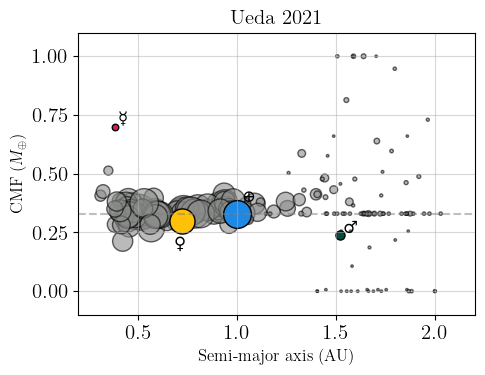

time = 3.00e+08 yrs


In [7]:
ueda_v3_pldf = pd.concat(ueda_v3_pldf_list)

fig, ax = plt.subplots(figsize=(5, 4))

dot_scale = 400
color = colors[3]

ax.grid(True, alpha=0.5)
ax.plot([0.2, 2.2], [0.33, 0.33], linestyle='dashed', color='grey', alpha=0.5)

# Scatter for Ueda 2021 data
ax.scatter(
    ueda_v3_pldf['semi'], ueda_v3_pldf['cmf'],
    alpha=0.6, color=color, edgecolors='black', linewidths=1,
    s=ueda_v3_pldf['mass'] * sol_to_earth * dot_scale
)

# Add Mercury
ax.scatter(0.387, 0.7, color='#D81B60', edgecolors='black', linewidths=1, s=0.055 * dot_scale, label='Mercury')
ax.annotate('☿', [0.4, 0.71], fontsize=12, usetex=False)

# Add Venus
ax.scatter(0.723, 0.3, color='#FFC107', edgecolors='black', linewidths=1, s=0.815 * dot_scale, label='Venus')
ax.annotate('♀', [0.68, 0.18], fontsize=12, usetex=False)

# Add Earth
ax.scatter(1, 0.33, color='#1E88E5', edgecolors='black', linewidths=1, s=dot_scale, label='Earth')
ax.annotate('⊕', [1.02, 0.38], fontsize=12, usetex=False)

# Add Mars
ax.scatter(1.52, 0.24, color='#004D40', edgecolors='black', linewidths=1, s=0.107 * dot_scale, label='Mars')
ax.annotate('♂', [1.53, 0.25], fontsize=12, usetex=False)

# Axis limits & labels
ax.set_xlim(0.2, 2.2)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Semi-major axis (AU)', fontsize=12)
ax.set_ylabel(r'CMF ($M_\oplus$)', fontsize=12)
ax.set_title("Ueda 2021")

plt.tight_layout()
plt.show()

print(f"time = {cut_time:.2e} yrs")


In [8]:
len(ueda_v3_pldf['sim_id'].unique())

28

We start with plotting all Ueda simulations and pick a few intresting ones. 

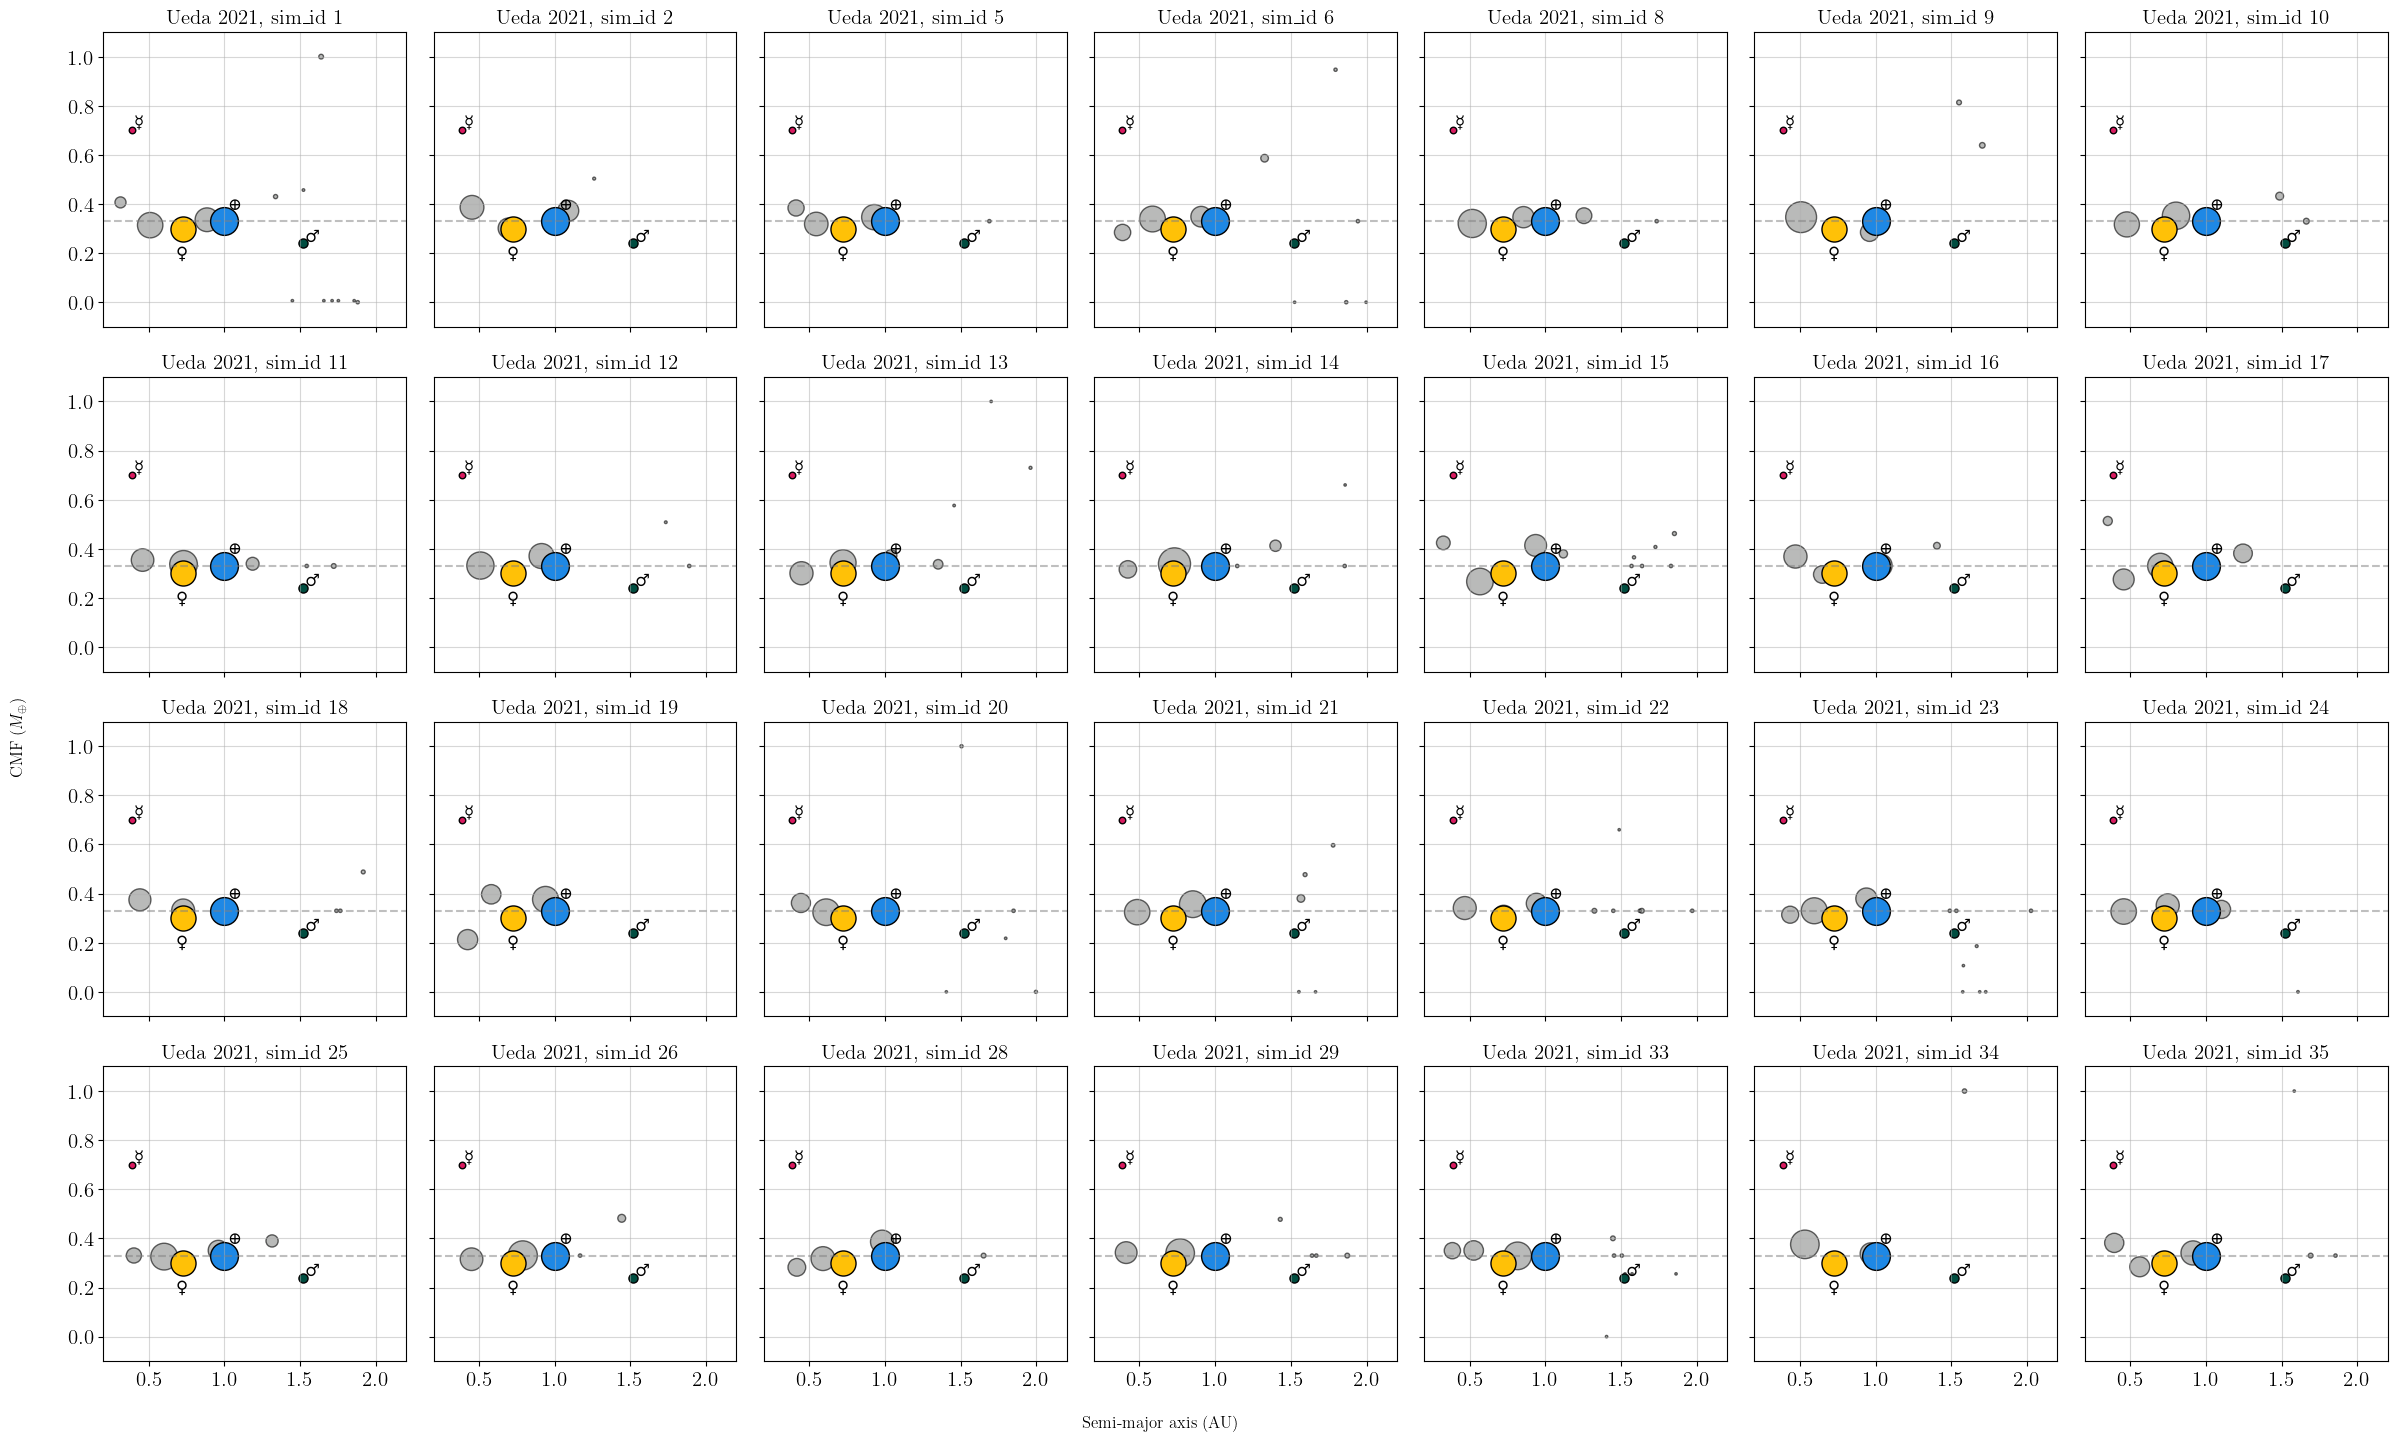

time = 3.00e+08 yrs


In [9]:
ueda_v3_pldf = pd.concat(ueda_v3_pldf_list)

fig, axes = plt.subplots(4, 7, figsize=(25, 15), sharey=True, sharex=True)

# Plot configs
datasets = [
    (f"Ueda 2021, sim_id {sid}", 
     ueda_v3_pldf[ueda_v3_pldf['sim_id'] == sid], 
     colors[3])  # cycles through colors
    for i, sid in enumerate(ueda_v3_pldf['sim_id'].unique())
]

dot_scale = 400

for ax, (label, df, color) in zip(axes.flat, datasets):
    ax.grid(True, alpha = 0.5)
    ax.plot([0.2, 2.2], [0.33, 0.33], linestyle='dashed', color='grey', alpha=0.5)

    ax.scatter(df['semi'], df['cmf'], alpha=0.6, color=color,
               edgecolors='black', linewidths=1, s = df['mass'] * sol_to_earth * dot_scale)

    # Add Mercury & Earth
    ax.scatter(0.387, 0.7, color='#D81B60', edgecolors='black', linewidths=1, s= 0.055 * dot_scale, label = 'Mercury')
    ax.annotate('☿', [0.4, 0.71], fontsize=12, usetex=False)

    ax.scatter(0.723, 0.3, color='#FFC107', edgecolors='black', linewidths=1, s=0.815 * dot_scale, label = 'Venus')
    ax.annotate('♀', [0.68, 0.18], fontsize=12, usetex=False)

    ax.scatter(1, 0.33, color='#1E88E5', edgecolors='black', linewidths=1, s=dot_scale, label = 'Earth')
    ax.annotate('⊕', [1.02, 0.38], fontsize=12, usetex=False)

    ax.scatter(1.52, 0.24, color='#004D40', edgecolors='black', linewidths=1, s=0.107 * dot_scale, label = 'Mars')
    ax.annotate('♂', [1.53, 0.25], fontsize=12, usetex=False)

   
    # Reference lines
    #ax.plot([0.35, 2], [0.3, 0.3], linestyle='dashed', color='grey', alpha=0.5)
    #ax.plot([0.35, 0.35], [0.01, 1.2], linestyle='dashed', color='grey', alpha=0.5)
    #ax.plot([0.7, 0.7], [0.01, 1.2], linestyle='dashed', color='grey', alpha=0.5)

    ax.set_xlim(0.2, 2.2)
    ax.set_ylim(-0.1,1.1)
    ax.set_title(label)

#ax.legend(loc = 'upper right')

# Shared axis labels
fig.text(0.5, 0.04, 'Semi-major axis (AU)', ha='center', fontsize=12)
fig.text(0.04, 0.5, r'CMF ($M_\oplus$)', va='center', rotation='vertical', fontsize=12)

#fig.suptitle('Uniform CMF distributions (0.33)')
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.savefig("all_sims.pdf", dpi=300)  # or .png

plt.show()

print(f"time = {cut_time:.2e} yrs")
#print("mean max time reached for Ueda v1 = ", np.average(maxtimes_ueda_v1)/1e6, "Myrs")
#print("mean max time reached for Cham = ", np.average(maxtimes_cham_bench)/1e6, "Myrs")

Simulation 9 seems pretty cool. Let's find the hash of the high CMF object whose mass is most close to Mercury.

In [10]:
sim_9 = ueda_v3_pldf[ueda_v3_pldf['sim_id'] == 9]
sim_9['mass'] = sim_9['mass'] * sol_to_earth

/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_57476/2802656341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_9['mass'] = sim_9['mass'] * sol_to_earth


In [11]:
sim_9

hash      mass       cmf  tot_disk_cmf boundary percentage      semi  \
0 5.600e+01 4.080e-02 6.389e-01     3.000e-01     none       none 1.705e+00   
1 6.900e+01 4.327e-01 2.848e-01     3.000e-01     none       none 9.604e-01   
2 1.160e+02 1.236e+00 3.464e-01     3.000e-01     none       none 5.083e-01   
3 1.470e+02 2.975e-02 8.135e-01     3.000e-01     none       none 1.551e+00   
4 2.216e+09 8.770e-03 9.616e-01     3.000e-01     none       none 5.203e+00   
5 8.470e+08 7.585e-03 0.000e+00     3.000e-01     none       none 9.544e+00   

   sim_id  
0       9  
1       9  
2       9  
3       9  
4       9  
5       9

Object 56 seems cool because its mass is 0.04 M_Earth and its CMF is 0.63. Let's follow that one.

In [12]:
sim_9_oi = sim_9[sim_9['hash'] ==  5.600000e+01]

We load simarchive to follow her history. 

In [13]:
sim_9_simarchive = rebound.Simulationarchive("../../../data/ueda_v3/ueda_v3_9/ueda_v3_9")
sim_9_dataframe = pd.DataFrame(columns=['t', 'm', 'a'])

for i in range(int(len(sim_9_simarchive))):
    instance = sim_9_simarchive[i]
    sim_9_dataframe.loc[i, 't'] = instance.t
    
    for particle in instance.particles:
        if particle.hash.value == int(sim_9_oi['hash']):
            sim_9_dataframe.loc[i, 'm'] = particle.m
            sim_9_dataframe.loc[i, 'a'] = particle.a
            break  # stop once found

sim_9_dataframe['m'] = sim_9_dataframe['m'] * sol_to_earth

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_57476/2282396990.py:9: FutureWarning: Calling int on a s

In [14]:
len(sim_9_simarchive)

3001

In [15]:
coll_hist_array = np.loadtxt('../../../data/ueda_v3/ueda_v3_9/collision_report.txt',  usecols=(0, 1, 2, 3, 4, 5, 6, 7) )
coll_hist = pd.DataFrame(coll_hist_array, columns=['t', 'type', 'b', 'hash_t', 'm_t', 'r_t', 'hash_p', 'r_p'])

In [16]:
coll_hist_oi = coll_hist[coll_hist['hash_t'] == 56]

In [17]:
coll_hist_oi

t      type         b    hash_t       m_t       r_t    hash_p  \
29  8.668e+04 1.000e+00 9.584e-06 5.600e+01 8.810e-08 1.609e-05 4.800e+01   
96  9.627e+05 1.000e+00 2.510e-06 5.600e+01 1.322e-07 1.842e-05 3.500e+01   
105 1.060e+06 3.000e+00 5.946e-06 5.600e+01 1.096e-07 1.731e-05 6.400e+01   
109 1.089e+06 0.000e+00 2.700e-05 5.600e+01 1.096e-07 1.731e-05 3.900e+01   
128 1.324e+06 0.000e+00 2.625e-05 5.600e+01 1.096e-07 1.731e-05 1.218e+09   
156 2.187e+06 0.000e+00 2.542e-05 5.600e+01 1.096e-07 1.731e-05 1.400e+01   
270 7.324e+06 0.000e+00 2.889e-05 5.600e+01 1.096e-07 1.731e-05 2.000e+01   
372 1.377e+07 0.000e+00 2.267e-05 5.600e+01 1.096e-07 1.731e-05 1.300e+02   
542 8.101e+07 1.000e+00 1.655e-05 5.600e+01 1.412e-07 1.883e-05 1.218e+09   
573 1.633e+08 3.000e+00 9.166e-06 5.600e+01 1.374e-07 1.866e-05 1.450e+02   
574 1.676e+08 3.000e+00 1.068e-05 5.600e+01 1.225e-07 1.796e-05 1.104e+09   
579 2.158e+08 0.000e+00 2.550e-05 5.600e+01 1.225e-07 1.796e-05 3.112e+09   

          r_p  
29  1.277e-05  
96  1.277e-05  
105 1.277e-05  
109 1.277e-05  
128 1.143e-05  
156 1.277e-05  
270 1.277e-05  
372 1.277e-05  
542 1.143e-05  
573 1.277e-05  
574 1.014e-05  
579 1.042e-05

Red lines show erosive collisions. Blue lines show mergers, and grey lines show elastic bounce.

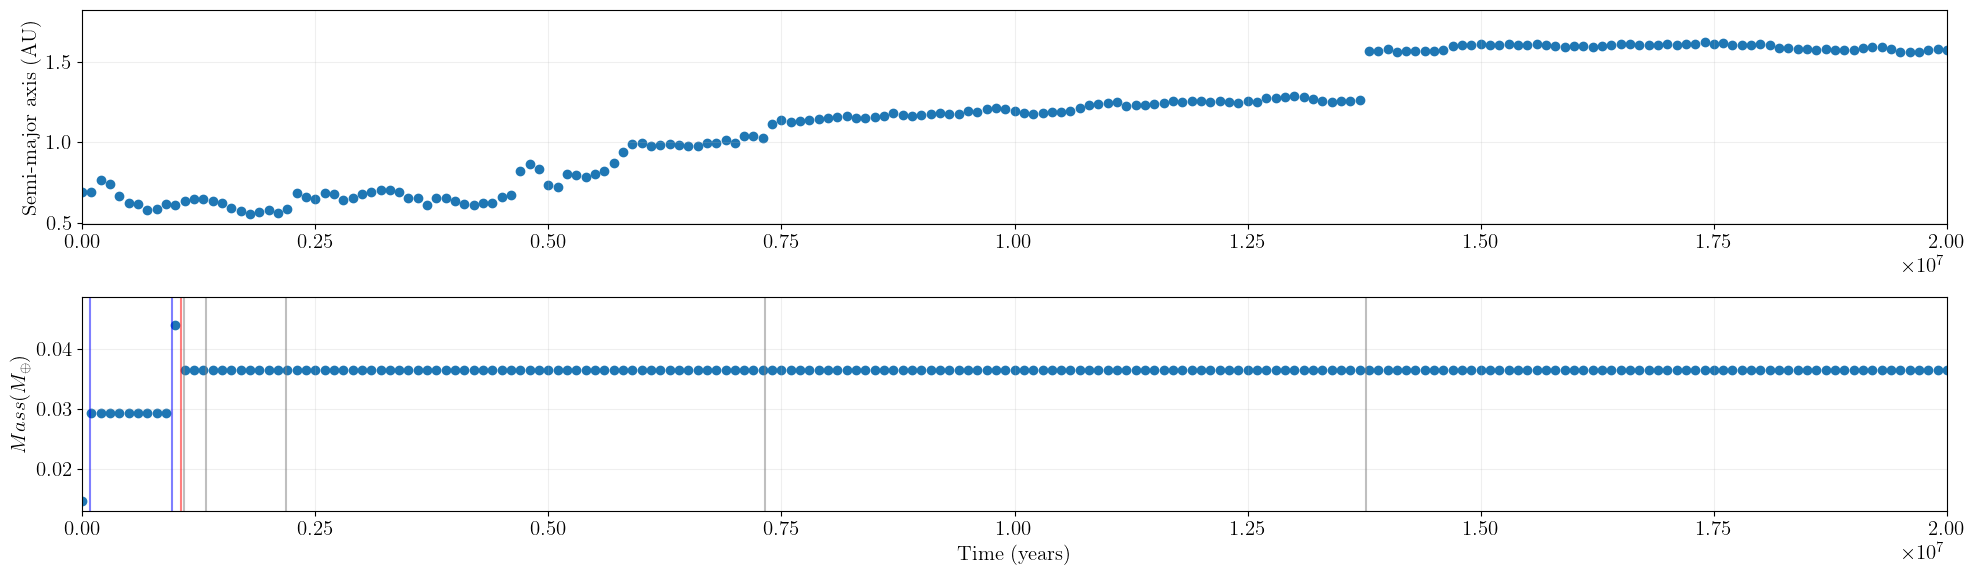

In [18]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)
plt.scatter(sim_9_dataframe['t'], sim_9_dataframe['a'])
plt.grid('True', alpha = 0.2)
plt.ylabel('Semi-major axis (AU)')
plt.xlim(0,20e6)

plt.subplot(2,1,2)
for t, type in zip(coll_hist_oi['t'], coll_hist_oi['type']):
    if (type == 3) | (type == 4):
        color = 'red'
    if type == 1:
        color = 'blue'
    if type == 0:
        color = 'gray'
    if type == 2:
        color = 'green'
    plt.axvline(t, color = color, alpha = 0.5)

plt.scatter(sim_9_dataframe['t'], sim_9_dataframe['m'])
plt.grid('True', alpha = 0.2)
plt.ylabel(r'$Mass (M_{\oplus})$')
plt.xlabel('Time (years)')
plt.xlim(0,20e6)

plt.tight_layout()
plt.show()

In [19]:
from planet_cookbook import track_particle

coll_ev_147 = track_particle.get_particle_evolution_history("../../../data/ueda_v3/ueda_v3_9/ueda_v3_9", 147.0)

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: Run

In [20]:
coll_ev_147

t         m         a
0    0.000e+00 1.467e-02 1.303e+00
1    1.000e+05 1.467e-02 1.298e+00
2    2.000e+05 1.467e-02 1.320e+00
3    3.000e+05 2.933e-02 1.335e+00
4    4.000e+05 2.933e-02 1.366e+00
...        ...       ...       ...
2996 2.996e+08 2.975e-02 1.545e+00
2997 2.997e+08 2.975e-02 1.548e+00
2998 2.998e+08 2.975e-02 1.554e+00
2999 2.999e+08 2.975e-02 1.555e+00
3000 3.000e+08 2.975e-02 1.551e+00

[3001 rows x 3 columns]

In [21]:
coll_hist_147 = track_particle.get_particle_collision_history("../../../data/ueda_v3/ueda_v3_9/collision_report.txt", 147)

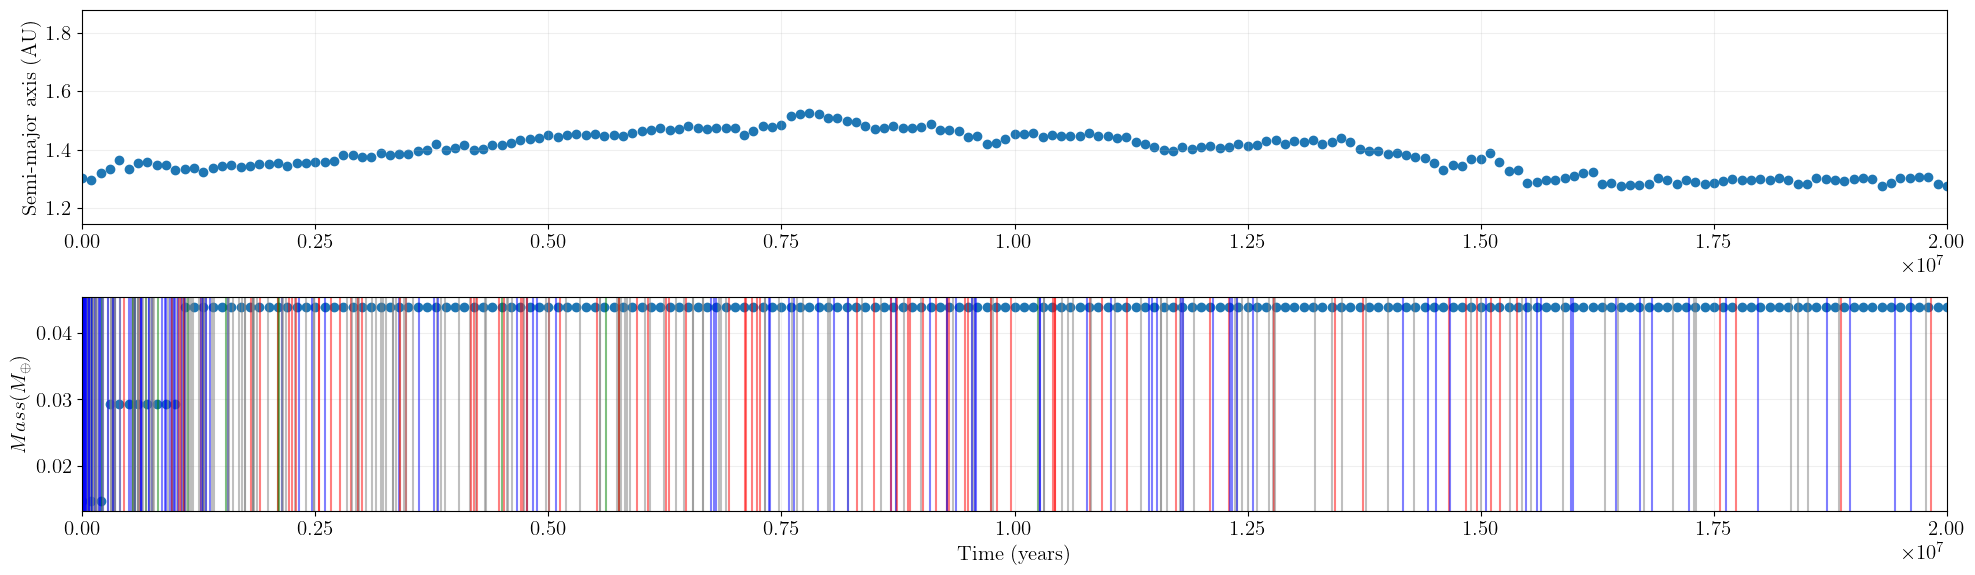

In [22]:
track_particle.plot_a_m_hist(coll_ev_147, coll_hist_147)

In [23]:
len(sim_9_simarchive)/1e5

0.03001

In [25]:
sim_6 = ueda_v3_pldf[ueda_v3_pldf['sim_id'] == 6]
sim_6

hash      mass       cmf  tot_disk_cmf boundary percentage      semi  \
0  1.400e+01 4.405e-08 3.300e-01     3.000e-01     none       none 1.943e+00   
1  2.200e+01 1.038e-06 2.841e-01     3.000e-01     none       none 3.887e-01   
2  7.200e+01 2.605e-06 3.389e-01     3.000e-01     none       none 5.863e-01   
3  1.050e+02 2.283e-07 5.864e-01     3.000e-01     none       none 1.327e+00   
4  1.300e+02 1.669e-06 3.483e-01     3.000e-01     none       none 9.080e-01   
5  1.470e+02 4.166e-08 9.468e-01     3.000e-01     none       none 1.795e+00   
6  2.910e+09 2.639e-08 0.000e+00     3.000e-01     none       none 5.202e+00   
7  9.064e+08 2.327e-08 0.000e+00     3.000e-01     none       none 9.547e+00   
8  3.783e+09 2.327e-08 0.000e+00     3.000e-01     none       none 1.997e+00   
9  4.019e+09 2.203e-08 0.000e+00     3.000e-01     none       none 1.525e+00   
10 3.016e+09 4.155e-08 0.000e+00     3.000e-01     none       none 1.866e+00   

    sim_id  
0        6  
1        6  
2        6  
3        6  
4        6  
5        6  
6        6  
7        6  
8        6  
9        6  
10       6